In [10]:
from platon.TP_profile import Profile
p = Profile()
Teq=677
p.set_isothermal(Teq)
#p.set_parametric(1000, 1e2, 0.5, 0.6, 1e6, 1900)
# p is set in SI units

In [13]:
##############emission spectra setup#################################
import platon
from platon.eclipse_depth_calculator import EclipseDepthCalculator
Rs=1.26*platon.constants.R_sun
#Rp=
Mp=10.5*platon.constants.M_jup
Mp= 21 * platon.constants.M_earth
Rp=1.204*platon.constants.R_jup
calc = EclipseDepthCalculator(method="xsec")
#calc.change_wavelength_bins(wavelength_bins)
Tstar=6400
wavelengths, depths,info_dict = calc.compute_depths(p, Rs, Mp, Rp, Tstar,logZ=0.0,CO_ratio=0.53,full_output=True,stellar_blackbody=True)
print (info_dict)

{'absorption_coeff_atm': array([[9.71444476e-15, 9.67575203e-15, 9.63720568e-15, ...,
        2.42299137e-21, 1.67984292e-16, 1.00445072e-19],
       [1.08544722e-14, 1.08112387e-14, 1.07681688e-14, ...,
        3.01549309e-21, 1.87701770e-16, 1.13025956e-19],
       [1.21282862e-14, 1.20799791e-14, 1.20318548e-14, ...,
        3.75288112e-21, 2.09733624e-16, 1.27182614e-19],
       ...,
       [7.81547679e-03, 7.78434482e-03, 7.75333581e-03, ...,
        3.42674761e+01, 3.39339763e+01, 3.35921638e+01],
       [8.73269426e-03, 8.69790857e-03, 8.66326046e-03, ...,
        3.94618288e+01, 3.91580296e+01, 3.88493851e+01],
       [9.75755556e-03, 9.71868733e-03, 9.67997307e-03, ...,
        4.54435550e+01, 4.51863133e+01, 4.49293690e+01]]), 'radii': array([1.78132060e+08, 1.77117821e+08, 1.76115067e+08, 1.75123602e+08,
       1.74143239e+08, 1.73173790e+08, 1.72215076e+08, 1.71266918e+08,
       1.70329144e+08, 1.69401583e+08, 1.68484070e+08, 1.67576442e+08,
       1.66678540e+08, 1.657902

In [3]:
import numpy as np
wave=1e-6*np.linspace(0.5,4.5,100)
print (wave)
wavelength_bins = [[w-0.0095e-6, w+0.0095e-6] for w in wave]

[5.00000000e-07 5.40404040e-07 5.80808081e-07 6.21212121e-07
 6.61616162e-07 7.02020202e-07 7.42424242e-07 7.82828283e-07
 8.23232323e-07 8.63636364e-07 9.04040404e-07 9.44444444e-07
 9.84848485e-07 1.02525253e-06 1.06565657e-06 1.10606061e-06
 1.14646465e-06 1.18686869e-06 1.22727273e-06 1.26767677e-06
 1.30808081e-06 1.34848485e-06 1.38888889e-06 1.42929293e-06
 1.46969697e-06 1.51010101e-06 1.55050505e-06 1.59090909e-06
 1.63131313e-06 1.67171717e-06 1.71212121e-06 1.75252525e-06
 1.79292929e-06 1.83333333e-06 1.87373737e-06 1.91414141e-06
 1.95454545e-06 1.99494949e-06 2.03535354e-06 2.07575758e-06
 2.11616162e-06 2.15656566e-06 2.19696970e-06 2.23737374e-06
 2.27777778e-06 2.31818182e-06 2.35858586e-06 2.39898990e-06
 2.43939394e-06 2.47979798e-06 2.52020202e-06 2.56060606e-06
 2.60101010e-06 2.64141414e-06 2.68181818e-06 2.72222222e-06
 2.76262626e-06 2.80303030e-06 2.84343434e-06 2.88383838e-06
 2.92424242e-06 2.96464646e-06 3.00505051e-06 3.04545455e-06
 3.08585859e-06 3.126262

[3.52948611e-24 3.75881598e-24 4.00279002e-24 ... 9.31561255e+02
 8.86150434e+02 8.80593940e+02]


Text(0.5, 0, 'Wavelength (um)')

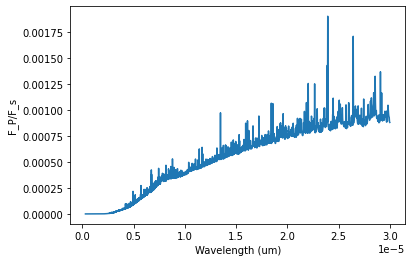

In [15]:
import matplotlib.pyplot as plt
plt.plot(wavelengths,depths)
print (depths*1e6)
#plt.xlim(0.5,0.8)
#plt.gca().invert_yaxis()
#plt.semilogy(info_dict['T_profile'],info_dict['P_profile']*1e-5)
#print (len(info_dict['T_profile']))
#plt.ylabel('P (bar)')
#plt.xlabel('T (K)')
#n=
''''s=0.0
for i in range(len(wavelengths)-1):
    s=s+0.5*(depths[i]+depths[i+1])*(wavelengths[1]-wavelengths[0])
s=s*1e12
print (s)'''
plt.ylabel('F_P/F_s')
plt.xlabel('Wavelength (um)')
#plt.savefig('Wasp-18b_emission.pdf',format='pdf')

In [4]:
import numpy as np
np.savetxt('TOI_1130b_emission.txt',np.column_stack((wavelengths*1e6,depths)))

In [5]:
from platon.transit_depth_calculator import TransitDepthCalculator
from platon.constants import M_jup, R_jup, R_sun,M_jup
import platon
from platon.abundance_getter import AbundanceGetter
getter = AbundanceGetter()
# All inputs and outputs for PLATON are in SI
Rs=1.29*platon.constants.R_sun
#Rp=
#Mp=20*platon.constants.M_earth
Mp=0.2*platon.constants.M_jup
Rp=0.72*platon.constants.R_jup
T=670
Tstar=4962
abundances = getter.get(-1.0, 0.53)
#abundances["CH4"] *= 0
# The initializer loads all data files.  Create a TransitDepthCalculator
# object and hold on to it
calculator = TransitDepthCalculator()

# compute_depths is fast once data files are loaded
wavelengths, depths, info_dict = calculator.compute_depths(Rs, Mp, Rp, T, logZ=None, CO_ratio=None,custom_abundances=abundances,full_output=True)

(1.0, 1.8)

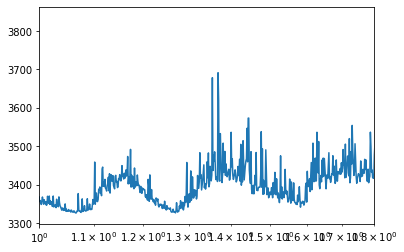

In [6]:
import matplotlib.pyplot as plt
plt.semilogx(wavelengths*1e6,depths*1e6)
plt.xlim(1.0,1.8)
#plt.ylim(3500,5000)
#plt.ticklabel_format(style='plain')
#import pickle
#print (info_dict.keys())
#with open('v1298c_platon_output.pickle', 'wb') as handle:
#    pickle.dump(info_dict, handle)

In [23]:
import numpy as np
np.savetxt('V1298_taub_T_668_noCH4_transmission.txt',np.column_stack((wavelengths*1e6,depths)))

In [19]:
print (R_jup/R_sun)

0.10276268506540176


In [12]:
from platon.TP_profile import Profile
p = Profile()
Teq=977
#p.set_isothermal(Teq)
p.set_parametric(1000, 1e2, 0.5, 0.6, 1e6, 1900)

(693.7871807482494, 1753.0512448337627)

AttributeError: 'Profile' object has no attribute 'keys'